In [1]:
#OUR MISSION IS TO PERFORM THE FOLLOWING ACTIONS:

#1. Load the data, examine it and check for missing values etc

#2. Filter for the team ‘Arsenal’

#3. Plot Arsenal’s goals per game over time

#4. Plot Arsenal’s total goals per calendar month

#5. Calculate Arsenal’s average goals, when they play at home and when they play away from home

#6.  Examine the correlation of the home team corners and the away team corners

#7. Suggest a statistical model for the number of corners per game 

In [2]:
#1. Load the data, examine it and check for missing values etc

#We import necessary packages to explore and work with data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#We open the file and first cursory look at the football data in file E0

df = pd.read_csv('D:\Downloads\DATASETS\general\E0.csv')
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
2,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
3,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
4,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50


In [3]:
#There are some of the things I usually do to verify and clean the data
# df.info #general info
# df.dtypes #Types of data present
# df.isna() #Checking for NA values present
# pd.set_option('display.max_columns', 200) #Cursory look at the data, I want to see all columns, not just a few
# df.describe() #checking unusual deviations particularly or NA values
# df.(outlier cols of any kind).plot(kind = 'bar', figsize = (15,5))

In [4]:
#CLEAN THE DATA
#Null values?
#df.isna().sum()
#Outliers?


In [5]:
'''
Legend:
FTHG and HG = Full Time Home Team Goals
FTAG and AG = Full Time Away Team Goals
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
'''

#For the sake of clarity...
#We create a  dataframe that only contains columns associated to the data we need to explore: goals and corners
#We name this new dataframe Only Goals And Corners (ogac)

ogac = df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HC','AC']]
ogac.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HC,AC
0,13/08/16,Burnley,Swansea,0,1,0,0,7,4
1,13/08/16,Crystal Palace,West Brom,0,1,0,0,3,6
2,13/08/16,Everton,Tottenham,1,1,1,0,5,6
3,13/08/16,Hull,Leicester,2,1,1,0,5,3
4,13/08/16,Man City,Sunderland,2,1,1,0,9,6


In [6]:
#2. Filter for the team ‘Arsenal’
#We create a new dataframe with 'Arsenal' either playing home OR away:

only_arsenal = ogac[(ogac.HomeTeam == 'Arsenal')|(ogac.AwayTeam == 'Arsenal')]
only_arsenal.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HC,AC
7,14/08/16,Arsenal,Liverpool,3,4,1,1,5,4
12,20/08/16,Leicester,Arsenal,0,0,0,0,2,7
27,27/08/16,Watford,Arsenal,1,3,0,3,3,2
30,10/09/16,Arsenal,Southampton,2,1,1,1,6,1
42,17/09/16,Hull,Arsenal,1,4,0,1,2,4


In [32]:
#How many matches has Arsenal played in total? Response: 38
only_arsenal = only_arsenal.copy()
only_arsenal.count()

HomeTeam         38
AwayTeam         38
FTHG             38
FTAG             38
HTHG             38
HTAG             38
HC               38
AC               38
goals_at_home    38
goals_away       38
total_goals      38
dtype: int64

In [33]:
#Create column with home goals
only_arsenal['goals_at_home'] = only_arsenal.loc[only_arsenal['HomeTeam'] == 'Arsenal', 'FTHG']

In [34]:
#Create column with away goals
only_arsenal['goals_away'] = only_arsenal.loc[only_arsenal['AwayTeam'] == 'Arsenal', 'FTAG']
only_arsenal

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HC,AC,goals_at_home,goals_away,total_goals
Date,,,,,,,,,,,
2016-08-14,Arsenal,Liverpool,3,4,1,1,5,4,3.0,NaN,3.0
2016-08-20,Leicester,Arsenal,0,0,0,0,2,7,NaN,0.0,0.0
2016-08-27,Watford,Arsenal,1,3,0,3,3,2,NaN,3.0,3.0
2016-10-09,Arsenal,Southampton,2,1,1,1,6,1,2.0,NaN,2.0
2016-09-17,Hull,Arsenal,1,4,0,1,2,4,NaN,4.0,4.0
2016-09-24,Arsenal,Chelsea,3,0,3,0,9,1,3.0,NaN,3.0
2016-02-10,Burnley,Arsenal,0,1,0,0,2,6,NaN,1.0,1.0
2016-10-15,Arsenal,Swansea,3,2,2,1,5,6,3.0,NaN,3.0
2016-10-22,Arsenal,Middlesbrough,0,0,0,0,8,3,0.0,NaN,0.0


In [35]:
only_arsenal['goals_at_home'].fillna(0, inplace = True)
only_arsenal['goals_away'].fillna(0, inplace = True)
only_arsenal.head()

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HC,AC,goals_at_home,goals_away,total_goals
Date,,,,,,,,,,,
2016-08-14,Arsenal,Liverpool,3,4,1,1,5,4,3.0,0.0,3.0
2016-08-20,Leicester,Arsenal,0,0,0,0,2,7,0.0,0.0,0.0
2016-08-27,Watford,Arsenal,1,3,0,3,3,2,0.0,3.0,3.0
2016-10-09,Arsenal,Southampton,2,1,1,1,6,1,2.0,0.0,2.0
2016-09-17,Hull,Arsenal,1,4,0,1,2,4,0.0,4.0,4.0


In [36]:
#Create "total_goals" column
only_arsenal['total_goals'] = only_arsenal['goals_at_home'] + only_arsenal['goals_away']


In [37]:
only_arsenal.head()

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HC,AC,goals_at_home,goals_away,total_goals
Date,,,,,,,,,,,
2016-08-14,Arsenal,Liverpool,3,4,1,1,5,4,3.0,0.0,3.0
2016-08-20,Leicester,Arsenal,0,0,0,0,2,7,0.0,0.0,0.0
2016-08-27,Watford,Arsenal,1,3,0,3,3,2,0.0,3.0,3.0
2016-10-09,Arsenal,Southampton,2,1,1,1,6,1,2.0,0.0,2.0
2016-09-17,Hull,Arsenal,1,4,0,1,2,4,0.0,4.0,4.0


In [44]:
only_arsenal.reset_index(inplace = True)
only_arsenal.head()

,index,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HC,AC,goals_at_home,goals_away,total_goals
0,0,2016-08-14,Arsenal,Liverpool,3,4,1,1,5,4,3.0,0.0,3.0
1,1,2016-08-20,Leicester,Arsenal,0,0,0,0,2,7,0.0,0.0,0.0
2,2,2016-08-27,Watford,Arsenal,1,3,0,3,3,2,0.0,3.0,3.0
3,3,2016-10-09,Arsenal,Southampton,2,1,1,1,6,1,2.0,0.0,2.0
4,4,2016-09-17,Hull,Arsenal,1,4,0,1,2,4,0.0,4.0,4.0


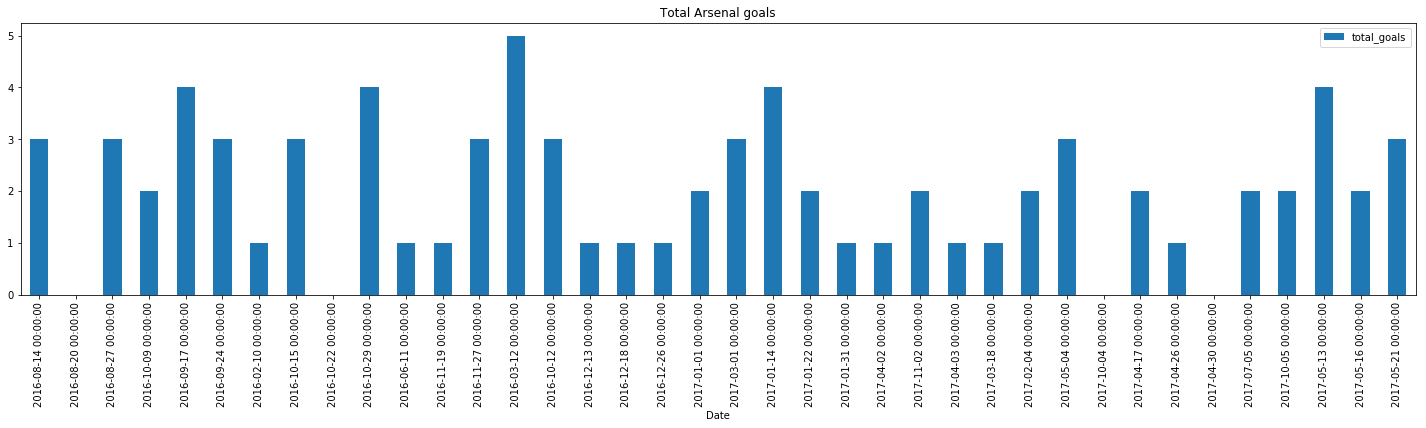

In [45]:
# ALL ARSENAL GOALS OVER TIME, PLOTTED 
plot = only_arsenal.plot(x='Date', y='total_goals', kind = 'bar', figsize = (25,5))
plt.title('Total Arsenal goals')
plt.xlabel = 'Date of match'
plt.ylabel = 'Number of goals'

# for i, v in enumerate(only_arsenal.total_goals):
#     plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

# plt.figure(figsize = (15,5))
# plt.scatter(x=only_arsenal['Date'], y=only_arsenal['total_goals'])
# plt.title('Total Arsenal goals')
# plt.xlabel = 'Date of match'
# plt.ylabel = 'Number of goals'

In [46]:
print(only_arsenal.index)

RangeIndex(start=0, stop=38, step=1)


In [47]:
#Converting Date col to date object
only_arsenal['Date'] = pd.to_datetime(only_arsenal['Date']) 

In [48]:
only_arsenal1 = only_arsenal
only_arsenal1.set_index('Date', inplace = True)
only_arsenal1.index

DatetimeIndex(['2016-08-14', '2016-08-20', '2016-08-27', '2016-10-09',
               '2016-09-17', '2016-09-24', '2016-02-10', '2016-10-15',
               '2016-10-22', '2016-10-29', '2016-06-11', '2016-11-19',
               '2016-11-27', '2016-03-12', '2016-10-12', '2016-12-13',
               '2016-12-18', '2016-12-26', '2017-01-01', '2017-03-01',
               '2017-01-14', '2017-01-22', '2017-01-31', '2017-04-02',
               '2017-11-02', '2017-04-03', '2017-03-18', '2017-02-04',
               '2017-05-04', '2017-10-04', '2017-04-17', '2017-04-26',
               '2017-04-30', '2017-07-05', '2017-10-05', '2017-05-13',
               '2017-05-16', '2017-05-21'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [49]:
monthly = only_arsenal1.total_goals.resample('M').mean()
monthly.fillna(0, inplace = True)
monthly

Date
2016-02-29    1.00
2016-03-31    5.00
2016-04-30    0.00
2016-05-31    0.00
2016-06-30    1.00
2016-07-31    0.00
2016-08-31    2.00
2016-09-30    3.50
2016-10-31    2.40
2016-11-30    2.00
2016-12-31    1.00
2017-01-31    2.25
2017-02-28    2.00
2017-03-31    2.00
2017-04-30    1.00
2017-05-31    3.00
2017-06-30    0.00
2017-07-31    2.00
2017-08-31    0.00
2017-09-30    0.00
2017-10-31    1.00
2017-11-30    2.00
Freq: M, Name: total_goals, dtype: float64

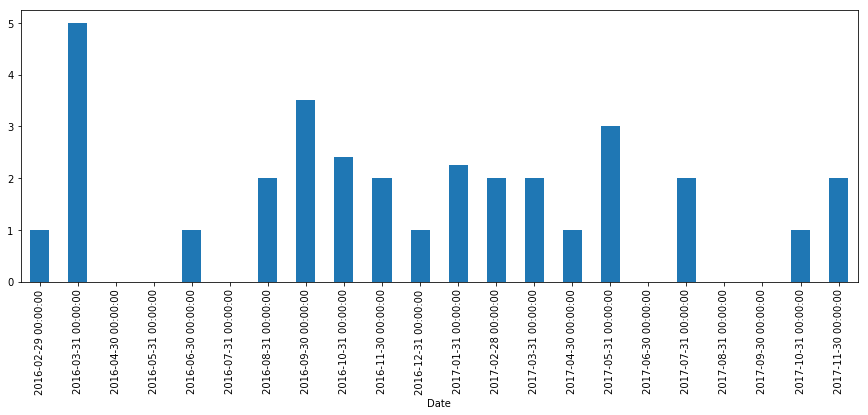

In [50]:
#4. Plot Arsenal’s total goals per calendar month
monthly.plot(kind = 'bar', figsize = (15,5))

In [51]:
#3. Plot Arsenal’s goals per game over time

#We explore the goals scored at home
Ars_home_goals = only_arsenal[only_arsenal.HomeTeam.str.contains('Arsenal')]
#Ars_home_goals.FTHG.plot(kind = 'bar')
total_home = Ars_home_goals.FTHG.sum()
print(total_home, 'goals at home')

#We explore the goals scored away from home
Ars_away_goals = only_arsenal[only_arsenal.AwayTeam.str.contains('Arsenal')] 
#Ars_away_goals.FTAG.plot(kind = 'bar')
total_away = Ars_away_goals.FTAG.sum()
print(total_away,'goals away from home')

#We have a total of goals and print it out
total_goals = Ars_home_goals.FTHG.sum() + Ars_away_goals.FTAG.sum()
print('At home and away, Arsenal has scored a total of',total_goals, 'goals, for the period measured')

#All Arsenal goals, home and away, plotted
#only_arsenal[['FTHG', 'FTAG']].plot(kind = 'bar', figsize = (10, 5))

#only_arsenal.plot(x = 'Date', y = ['FTHG', 'FTAG'], kind = 'bar', figsize = (15,5))
#only_arsenal

# def is_home1(x):
#     if x == 'Arsenal':
#         return only_arsenal['FTHG']
#     return 0

# only_arsenal['test1'] = only_arsenal.HomeTeam.apply(is_home1)
only_arsenal

39 goals at home
38 goals away from home
At home and away, Arsenal has scored a total of 77 goals, for the period measured


,index,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HC,AC,goals_at_home,goals_away,total_goals
Date,,,,,,,,,,,,
2016-08-14,0,Arsenal,Liverpool,3,4,1,1,5,4,3.0,0.0,3.0
2016-08-20,1,Leicester,Arsenal,0,0,0,0,2,7,0.0,0.0,0.0
2016-08-27,2,Watford,Arsenal,1,3,0,3,3,2,0.0,3.0,3.0
2016-10-09,3,Arsenal,Southampton,2,1,1,1,6,1,2.0,0.0,2.0
2016-09-17,4,Hull,Arsenal,1,4,0,1,2,4,0.0,4.0,4.0
2016-09-24,5,Arsenal,Chelsea,3,0,3,0,9,1,3.0,0.0,3.0
2016-02-10,6,Burnley,Arsenal,0,1,0,0,2,6,0.0,1.0,1.0
2016-10-15,7,Arsenal,Swansea,3,2,2,1,5,6,3.0,0.0,3.0
2016-10-22,8,Arsenal,Middlesbrough,0,0,0,0,8,3,0.0,0.0,0.0


The average of goals of Arsenal when playing at home is 1.0 goals
The average of goals of Arsenal when away from home is 1.0263157894736843 goals


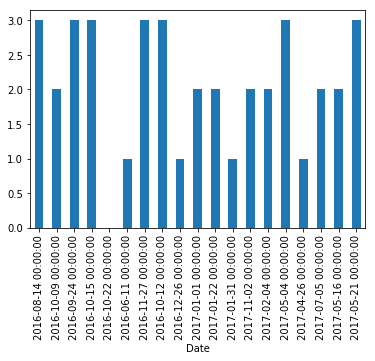

In [52]:
#5. Calculate Arsenal’s average goals, when they play at home and when they play away from home

avg_at_home =  only_arsenal.goals_at_home.mean()
avg_away =  only_arsenal.goals_away.mean()

#Plotting Arsenal's goals at HOME
Ars_home_goals.FTHG.plot(kind = 'bar')

print('The average of goals of Arsenal when playing at home is', avg_away, 'goals')
print('The average of goals of Arsenal when away from home is', avg_at_home, 'goals')


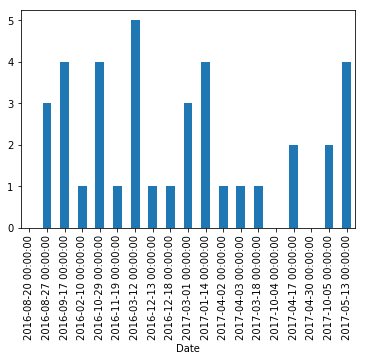

In [53]:
#Arsenal goals AWAY from home
Ars_away_goals.FTAG.plot(kind = 'bar')

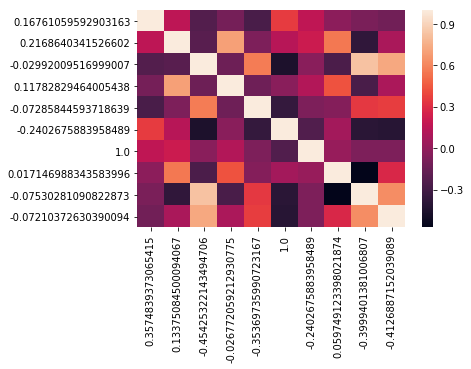

In [54]:
#6.  Examine the correlation of the home team corners and the away team corners
import seaborn as sns
corr = only_arsenal.corr()
corr = (corr)
sns.heatmap(corr,
           xticklabels = corr.HC.values,
           yticklabels = corr.AC.values)

#Based on the correlation graph...
#We could say that there appears NOT to be any significant correlation between the home and away team corners

In [55]:
#7. Suggest a statistical model for the number of corners per game 

In [56]:
df['AC'].corr(df['HC'])

-0.29572422767592293

In [57]:
#7. Suggest a statistical model for the number of corners per game
f = pd.read_csv('D:\Downloads\DATASETS\general\E0.csv', comment='#')

# Corners are specified in HC and AC, depending if Arsenal is playing
# home or away.
team = 'Arsenal'
sub = df[(df.HomeTeam == team) | (df.AwayTeam == team)]
corners = pd.Series(np.where(sub.HomeTeam == team, sub.HC, sub.AC))
corners.head()


0    5
1    7
2    2
3    6
4    4
dtype: int64

TypeError: 'str' object is not callable

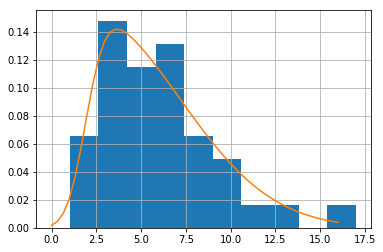

In [80]:
# By visual inspection, the corner distributions appears to be
# following a skew-normal distribution.
import scipy
from scipy.stats import skewnorm

#x = np.linspace(0, 16)
params = skewnorm.fit(corners)
y = skewnorm.pdf(x, *params) #loc=mean, scale=sigma)
corners.hist(bins=10, density = True, label='Observed corners')
plt.plot(x, y, label='Fit')
# plt.xlabel('# Corners / Match', size=14)
# plt.ylabel('Probability', size=14)
plt.legend()